### This example gets Hydraulic & Quality Time Series using binary file. 

This example contains:
* Load a network.
* Computed Hydraulic & Quality Time Series using binary file.
* Plot pressures.
* Get head curve.
* Set new head curve values.
* Computed hydraulics.
* Unload library.

In [4]:
import matplotlib.pyplot as plt
from epyt import epanet

# Load network
d = epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 0.0.1).
Input File Net1.inp loaded successfully.



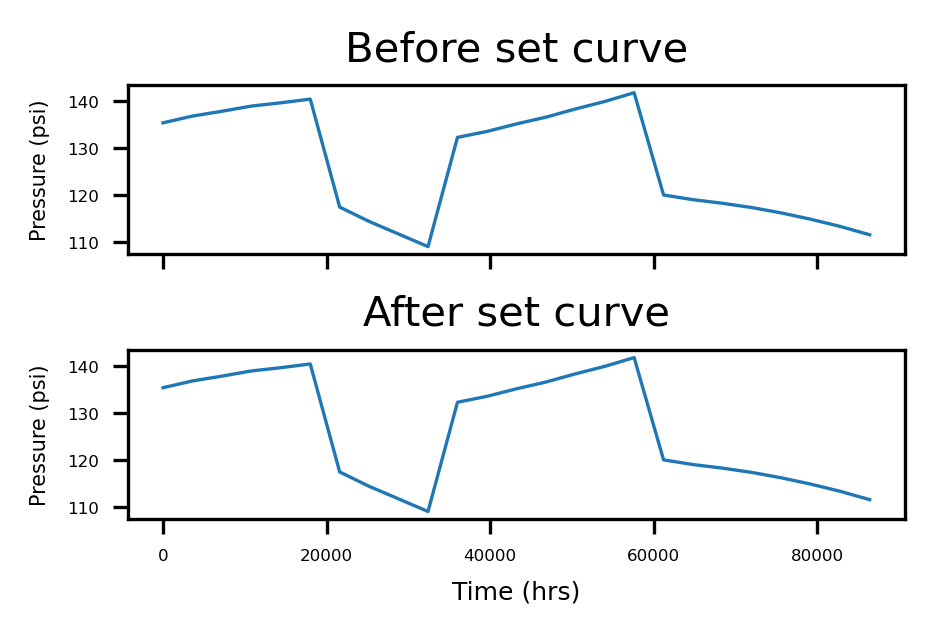

In [28]:
# Computed Hydraulic & Quality Time Series using binary file.
Results = d.getComputedTimeSeries()

nodeID = '10'
indexNode = d.getNodeIndex(nodeID)

# Plot pressures.
fig, axs = plt.subplots(2)
axs[0].plot(Results.Time, Results.Pressure[:, indexNode-1], linewidth=0.8)
axs[0].set_title('Before set curve', fontsize=10)
axs[0].label_outer()
axs[0].set_ylabel(f'Pressure ({d.units.NodePressureUnits})', fontsize=5)
axs[0].tick_params(axis='y', labelsize=4)

# Get head curve.
headCurve, pumpIndex = d.getLinkPumpHeadCurveIndex()

# Set new head curve values.
d.setCurve(headCurve, [2000, 250])
pumpIndex = d.getLinkPumpIndex()[0]
c_index = d.getCurveIndex()
d.setLinkPumpHeadCurveIndex(pumpIndex, headCurve)

# Computed hydraulics.
Results = d.getComputedTimeSeries()
axs[1].plot(Results.Time, Results.Pressure[:, indexNode-1], linewidth=0.8)
axs[1].set_title('After set curve', fontsize=10)
axs[1].set_xlabel('Time (hrs)', fontsize=6)
axs[1].set_ylabel(f'Pressure ({d.units.NodePressureUnits})', fontsize=5)
axs[1].tick_params(axis='x', labelsize=4)
axs[1].tick_params(axis='y', labelsize=4)


In [3]:
# Unload library.
d.unload()

Close toolkit for the input file "Net1". EPANET Toolkit is unloaded.

